In [1]:
from framsfiles import reader as framsreader
from emd_on_voxels import VoxelsEMD
import pandas as pd

from pyemd import emd
from utils import *


In [2]:
path = '/home/adam/Framsticks/Framsticks50rc19'
e = VoxelsEMD(FramsPath=path)


Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data



## Definition of input genotypes in f1 representation

In [3]:
geno1= "XXXXXXX"
geno2= "XCCCXCCCCXCCCCXCCCCXXXX"

# Generating and visualisation of Voxels
First step is to get voxels for specified genotypes using frams.

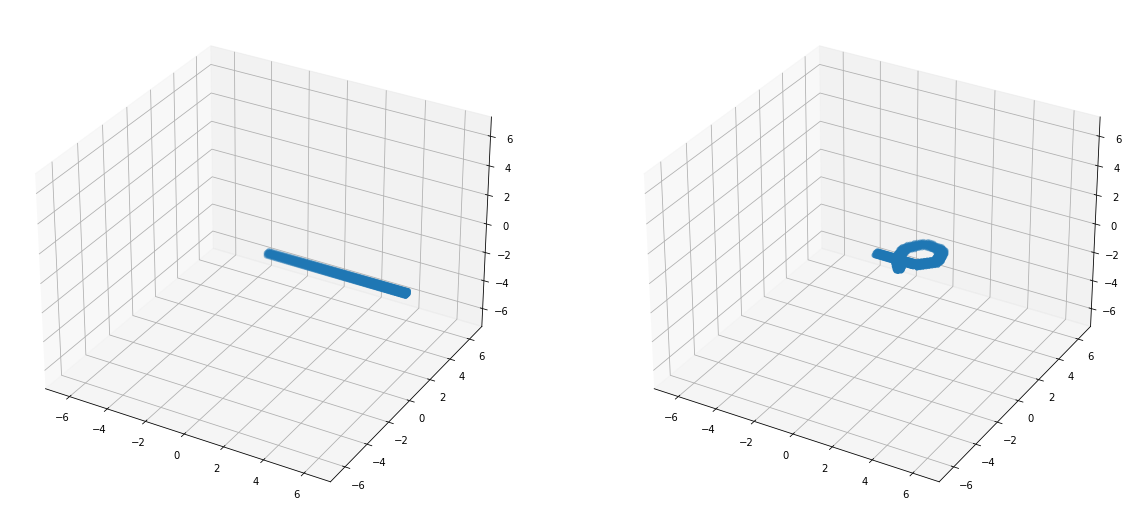

In [4]:
steps=5

voxels1 = e.getVoxels(geno1)
voxels2 = e.getVoxels(geno2)

numvox1 = len(voxels1)
numvox2 = len(voxels2)    

drawModel2(voxels1,voxels2,"images/Voxvis.pdf")

## Signatures before reduction
After obtaining voxels we generate signatures for each model.

Number of elements to calculate distance between is drastically reduced by sampling the space.
The size of each sample is proportional to the number of elements inside.<br />
The center of the sample is moved based on avg position of every element inside.<br />
The smallest circles has 0 elements inside.

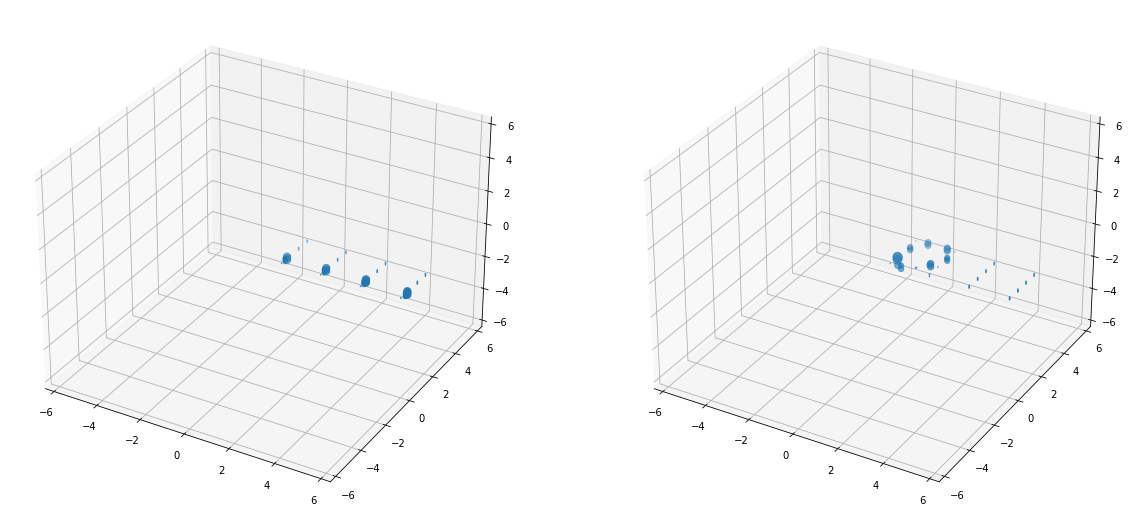

In [5]:
s1, s2 = e.getSignaturesForPair(voxels1,voxels2, steps=steps)
drawSignature(s1,s2,"images/signatures_before.pdf")

## Signatures after reduction

Most signatures can be reduced to speed up calculations <br />
After reduction we can see disappearance of samples that for both figures have 0 elements inside the sample.

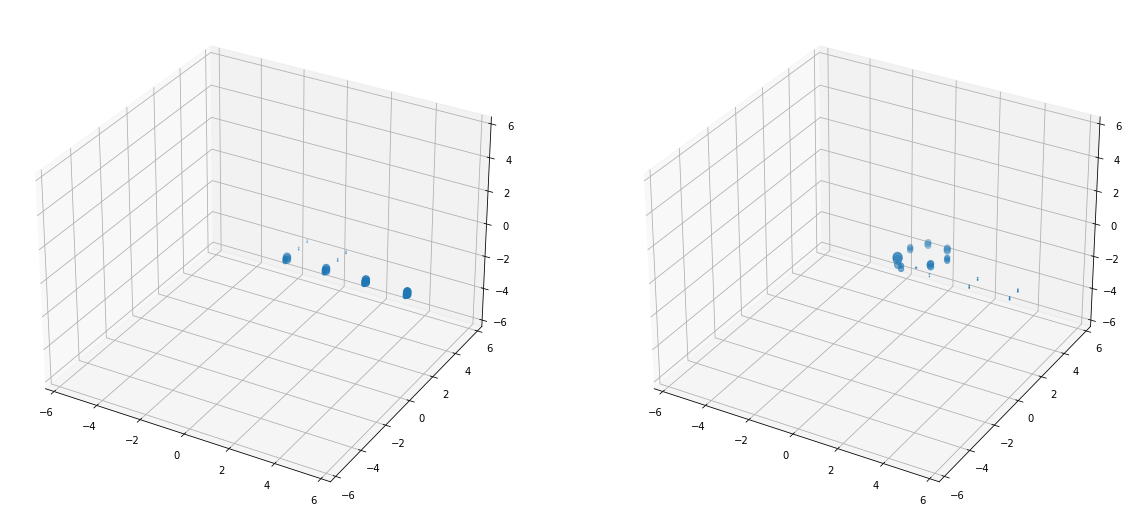

In [13]:
s1, s2 = e.reduceSignatures(s1,s2)
drawSignature(s1,s2,"images/signatures_after.pdf")

Number of voxels before and after reduction is the same.

In [7]:
print("Base voxels fig1: ", numvox1, " fig2: ",numvox2)
print("After reduction voxels fig1: ", sum(s1[1]), " fig2: ",sum(s2[1]))

Base voxels fig1:  852  fig2:  851
After reduction voxels fig1:  852.0  fig2:  851.0


Each signature consists of two parts, first part is the list of coordinates for each sample, second part is a list of weights for each sample. 

In [11]:
s1

[array([[ 0.85      , -0.12      , -0.1       ],
        [ 0.85      , -0.12      ,  0.        ],
        [ 0.85      , -0.12      ,  0.1       ],
        [ 0.85      ,  0.04      , -0.1       ],
        [ 0.85      ,  0.04      ,  0.        ],
        [ 0.85      ,  0.04      ,  0.1       ],
        [ 0.874925  ,  0.92409852, -0.075075  ],
        [ 0.874925  ,  0.92409852, -0.025025  ],
        [ 0.874925  ,  0.92409852,  0.075075  ],
        [ 0.874925  ,  1.60760451, -0.075075  ],
        [ 0.874925  ,  1.60760451, -0.025025  ],
        [ 0.874925  ,  1.60760451,  0.075075  ],
        [ 2.6       , -0.12      , -0.1       ],
        [ 2.6       , -0.12      ,  0.        ],
        [ 2.6       , -0.12      ,  0.1       ],
        [ 2.6       ,  0.04      , -0.1       ],
        [ 2.6       ,  0.04      ,  0.        ],
        [ 2.6       ,  0.04      ,  0.1       ],
        [ 2.624975  ,  0.92409852, -0.075075  ],
        [ 2.624975  ,  0.92409852, -0.025025  ],
        [ 2.624975  

### Matrix of distance between samples
When signatures are ready we calculate euclidean distance between samples in both figures.

In [9]:
dist_matrix = e.calculateDistanceMatrix(s1[0],s2[0])
dist_matrix

array([[0.627237  , 0.43443687, 0.65835116, ..., 5.28744404, 5.28791684,
        5.29028302],
       [0.63515845, 0.42277109, 0.63515845, ..., 5.28791826, 5.28744451,
        5.28791826],
       [0.65835116, 0.43443687, 0.627237  , ..., 5.29028302, 5.28886325,
        5.28744404],
       ...,
       [4.80107029, 4.9825134 , 4.80523423, ..., 0.20366608, 0.2155919 ,
        0.2674133 ],
       [4.80211161, 4.98150979, 4.80211161, ..., 0.2156267 , 0.20367834,
        0.2156267 ],
       [4.80523423, 4.9825134 , 4.80107029, ..., 0.2674133 , 0.23767597,
        0.20366608]])

# EMD for two figures
Using signatures for both models and distance matrix we calculate EMD using  [pyemd lib](https://pypi.org/project/pyemd/)


In [10]:
e.libm.fedisableexcept(0x04)  # allowing for operation divide by 0 because pyemd requiers it.

emd_out = emd(s1[1],s2[1],dist_matrix)

e.libm.feclearexcept(0x04) # disabling operation divide by 0 because framsticks doesnt like it.
e.libm.feenableexcept(0x04)

print("Steps: ", steps)
print("Geno1:\n",geno1)
print("Geno2:\n",geno2)
print("EMD:\n",emd_out)

Steps:  5
Geno1:
 XXXXXXX
Geno2:
 XCCCXCCCCXCCCCXCCCCXXXX
EMD:
 1744.218442697706
